In [1]:
from data.data import load_data,save_data
from data.analysis.summary import summary
import matplotlib.pyplot as plt
import pandas as pd

df_01 = load_data("03")

In [2]:
summary(df_01)

Data Summary:
Number of rows: 	 	368
Number of columns: 	 	32
Total missing values: 		0 from 11776 cells
Rows with missing values: 	0
% of rows with missing values: 	0.00%
Percentage of missing values: 	0.00%


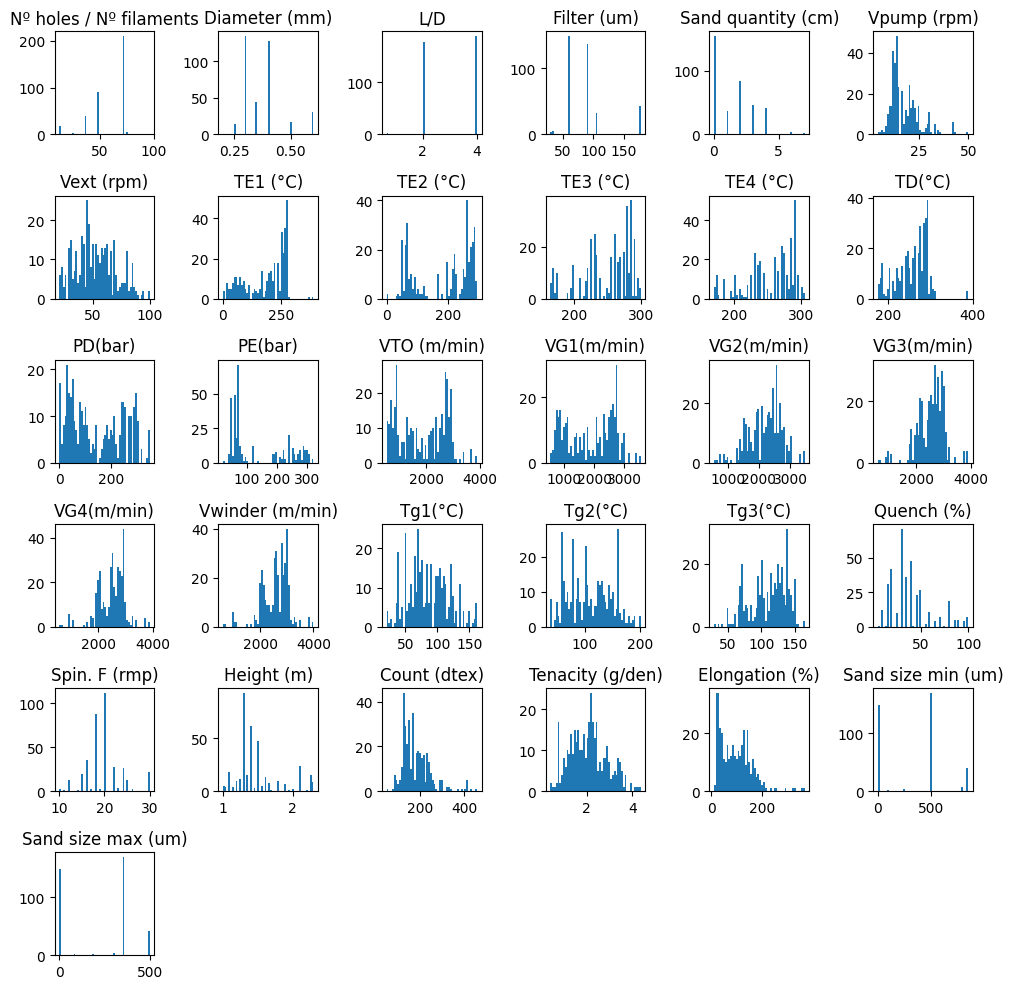

In [3]:
df_01.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [4]:
df_01.columns

Index(['Material', 'Nº holes / Nº filaments', 'Diameter (mm)', 'L/D',
       'Filter (um)', 'Sand quantity (cm)', 'Vpump (rpm)', 'Vext (rpm)',
       'TE1 (°C)', 'TE2 (°C)', 'TE3 (°C)', 'TE4 (°C)', 'TD(°C)', 'PD(bar)',
       'PE(bar)', 'VTO (m/min)', 'VG1(m/min)', 'VG2(m/min)', 'VG3(m/min)',
       'VG4(m/min)', 'Vwinder (m/min)', 'Tg1(°C)', 'Tg2(°C)', 'Tg3(°C)',
       'Quench (%)', 'Spin. F (rmp)', 'Height (m)', 'Count (dtex)',
       'Tenacity (g/den)', 'Elongation (%)', 'Sand size min (um)',
       'Sand size max (um)'],
      dtype='object')

In [5]:
material_groups = {}

materials = df_01["Material"].unique()

for mat_code in ["TPX","PHB","PET","PLA","PES","PP","TPE","PE","PA","PBT"]:
    selected = [imat for imat in materials if mat_code in imat]
    material_groups[mat_code] = selected
    #remove selected from materials
    materials = [imat for imat in materials if imat not in selected]

material_groups["other"] = materials

def get_material_group(material):
    for group, materials in material_groups.items():
        if material in materials:
            return group
    return "Otros"

df_01['Cluster'] = df_01['Material'].apply(get_material_group)
# lo ponemos al principio 
df_01 = df_01[['Cluster'] + [col for col in df_01.columns if col != 'Cluster']]

<Axes: xlabel='Cluster'>

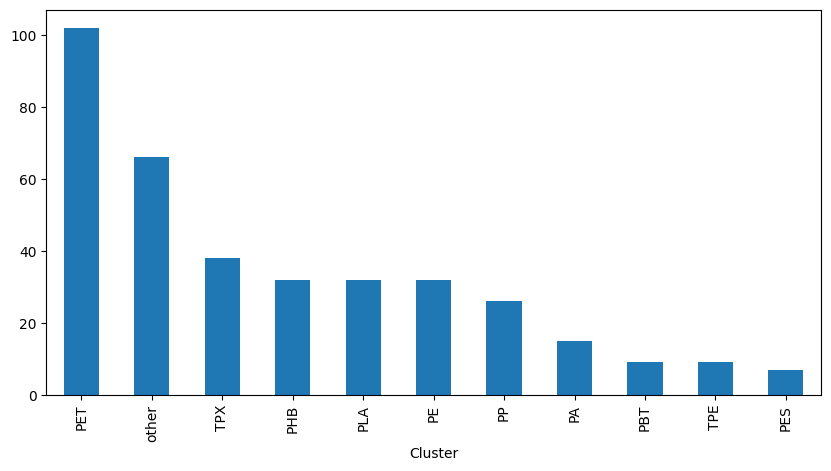

In [6]:
# count the number of materials in each group
df_01['Cluster'].value_counts().plot(kind='bar', figsize=(10, 5), grid=False)

In [7]:
df_01.pop('Material')

# remove rows Cluster == 'Other'

df_01 = df_01[df_01['Cluster'] != 'other']

<Axes: xlabel='Cluster'>

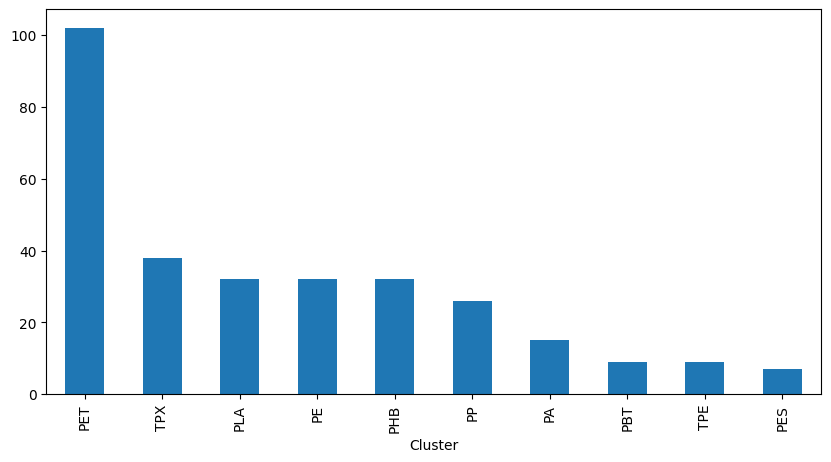

In [8]:
df_01['Cluster'].value_counts().plot(kind='bar', figsize=(10, 5), grid=False)

In [9]:
# change name Cluster -> Material
df_01.rename(columns={'Cluster': 'Material'}, inplace=True)

In [10]:
df_01["Material"].unique()

array(['PET', 'PLA', 'PP', 'PA', 'PE', 'PES', 'PBT', 'TPX', 'PHB', 'TPE'],
      dtype=object)

In [11]:
# save 04 
save_data(df_01, "04")

Data saved to /home/djoroya/projects/DIMAT/M03_AITEX_YARN/DIMAT_DATA_CLEAN_AITEX/src/data/AITEX_04.csv
